In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from numpy import argmax
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

In [2]:
#downloading breast cancer dataset as the df dataframe
df=pd.read_csv("data/wdbc.data", header=None, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [3]:
"""making column names"""
header=["id", "diagnosis", "radius", "texture", "perimeter", "area", "smoothness", "compactness", "contactivity", "concave_points", "symmetry", "fractal_dimension"]
df.columns=header
df

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,contactivity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [4]:
#checking for NaN values
df.isnull().sum()

id                   0
diagnosis            0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
contactivity         0
concave_points       0
symmetry             0
fractal_dimension    0
dtype: int64

In [5]:
#making the dataframe containing correlation values
cor=df.iloc[:, 2:].corr(method="pearson")
cor

,radius,texture,perimeter,area,smoothness,compactness,contactivity,concave_points,symmetry,fractal_dimension
radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
contactivity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


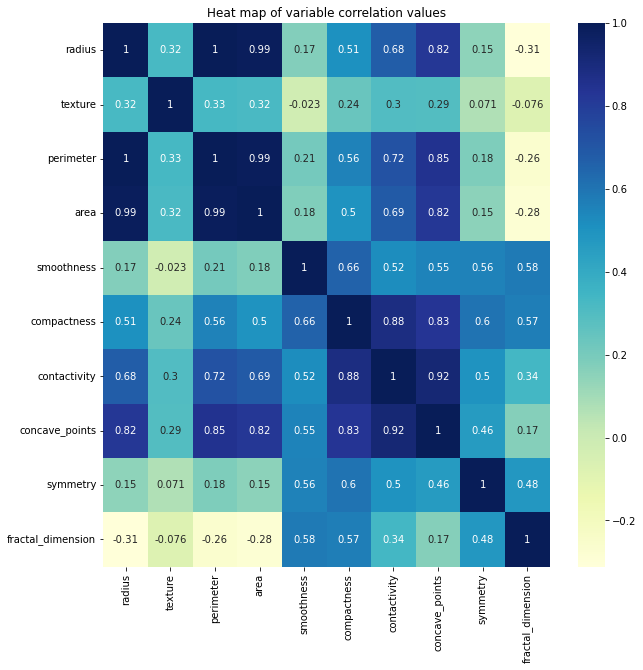

In [6]:
"""visualizing correlation values between features"""
plt.rcParams["figure.figsize"]=(10, 10)
sn.heatmap(data=cor, annot=True, cmap="YlGnBu")
plt.title("Heat map of variable correlation values")
plt.show()

In [7]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


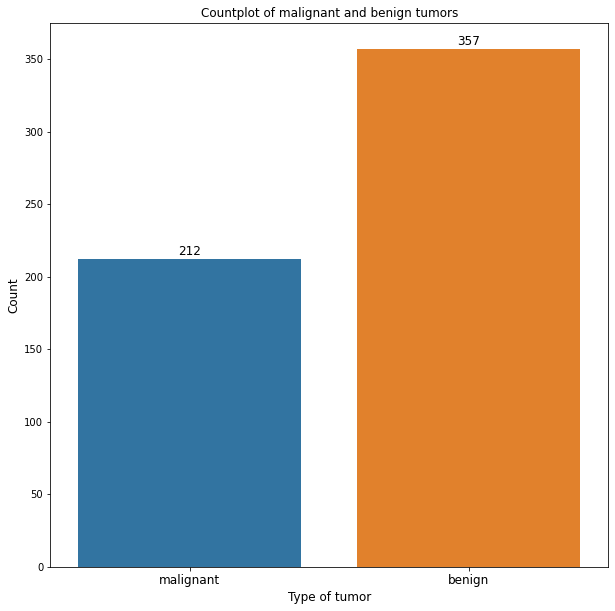

In [8]:
#count plot for the begign and malignant tumors
plot=sn.countplot(df["diagnosis"])

ax=plt.gca()
ax.set_xlabel("Type of tumor", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(["malignant", "benign"], fontsize=12)
ax.text(0, 215, "212", ha="center", fontsize=12)
ax.text(1, 360, "357", ha="center", fontsize=12)
plt.title("Countplot of malignant and benign tumors")
plt.show()

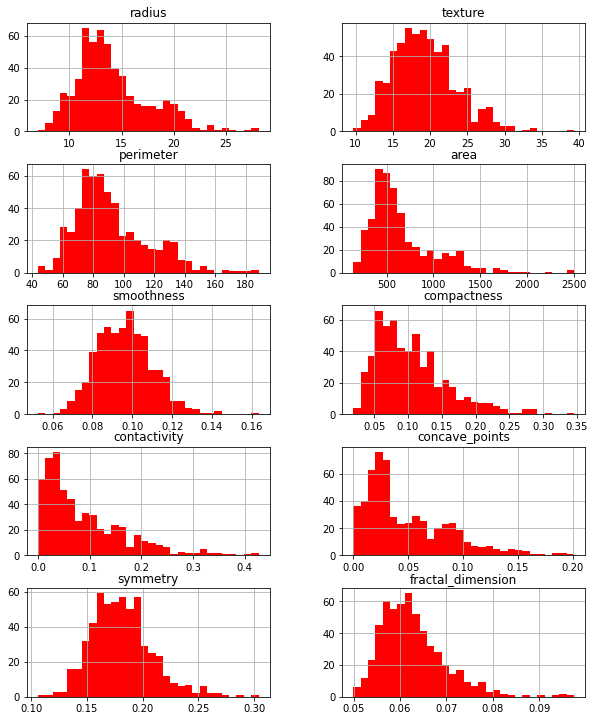

In [9]:
#histogram of the features of the dataset
df.iloc[:, 2:].hist(bins=30, facecolor="red", layout=(6, 2), figsize=(10, 15))
ax=plt.gca()
ax.set_title("histogram of all variables of the breast cancer dataset")
plt.show()

In [10]:
"""making feature array"""
X=df.iloc[:, 2:].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

In [11]:
#Encoding categorical data values
#Y=pd.get_dummies(df["diagnosis"]) another method to get one-hot encodong
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(df["diagnosis"])
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1000)

#### Defining the function returning confusion matrixx


In [13]:
"""defining the confusion_matrix_visual() method to visualize the confusion matrix"""
def confusion_matrix_visual(y_true, y_pred, class_labels, ax=None, title=None, **kwargs):
    """y_test: true labels for y
       y_pred: predicted labels for y
       class_labels: labels of differemt classes
       ax: matplotlib axes
       title: the plot title
       **kwargs: additional arguments in the form of a dictionary"""
    matrix=confusion_matrix(y_true, y_pred)
    ax=sn.heatmap(matrix.T, square=True, annot=True, fmt="d", cmap=plt.cm.Blues, ax=ax,  **kwargs)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Model Prediction")
    tick_marks=np.arange(len(class_labels))+0.5
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_labels)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_labels, rotation=0)
    ax.set_title("Confusion matrix")
    return ax

#### Support Vector Machine

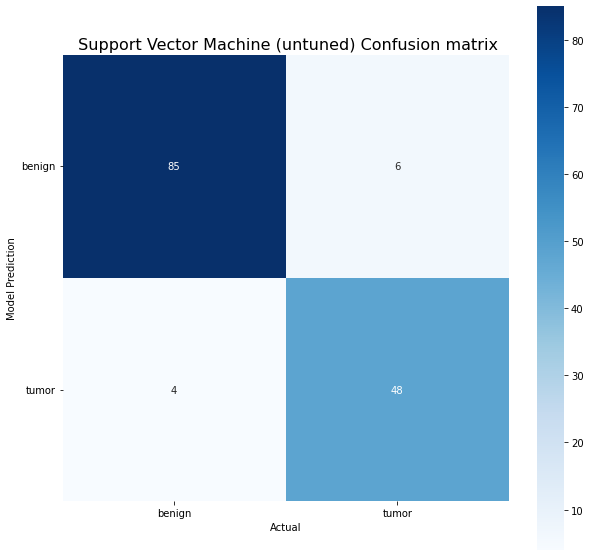

In [14]:
#making model for Support Vector Machine

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma=0.1, C=10.0, random_state = 1000)
model=Pipeline([
    ("scale", StandardScaler()),
    ("svc", SVC())
]).fit(X_train, Y_train)
predicted_labels=model.predict(X_test)

#visualizing the confusion matrix for Support Vector Machine
confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.title(" Support Vector Machine (untuned) Confusion matrix", fontsize=16)
plt.show()

In [15]:
#making the classification report for untuned SVM
print("Classification report for SVM")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for SVM
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        89
           1       0.92      0.89      0.91        54

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



In [16]:
print(f'accuracy for train dataset: {accuracy_score(Y_train, model.predict(X_train))}')
print(f'accuracy for test dataset: {accuracy_score(Y_test, predicted_labels)}')


accuracy for train dataset: 0.9624413145539906
accuracy for test dataset: 0.9300699300699301


#### Support Vector Machine with hyperparameter tuning

In [17]:
# List of C values
C_range = np.logspace(-1, 1, 3)
print(f'The list of values for C are {C_range}')

# List of gamma values
gamma_range = np.logspace(-1, 1, 3)
print(f'The list of values for gamma are {gamma_range}')

The list of values for C are [ 0.1  1.  10. ]
The list of values for gamma are [ 0.1  1.  10. ]


In [18]:
# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }

# Set up score
scoring = ['accuracy']

# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1000)

In [19]:
model= Pipeline([("scale",StandardScaler()), 
                    ("grid", GridSearchCV(estimator=SVC(random_state=1000), 
                           param_grid=param_grid, 
                           scoring="accuracy", 
                           refit=True, 
                           n_jobs=-1, 
                           cv=5, 
                           verbose=0))]).fit(X_train, Y_train)


predicted_labels=model.predict(X_test)
print(classification_report(Y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        89
           1       0.96      0.89      0.92        54

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



In [20]:
# Print the cross validation score for the training dataset
print(f'The cross validation score is {model["grid"].best_score_:.4f}')

# Print the hyperparameters for the best score
print(f'The best hyperparameters are {model["grid"].best_params_}')

# Print the best accuracy score for the train dataset
print(f'The accuracy score for the training dataset is {model["grid"].score(model["scale"].fit_transform(X_train), Y_train):.4f}')

# Print the best accuracy score for the test dataset
print(f'The accuracy score for the test dataset is {model["grid"].score(model["scale"].transform(X_test), Y_test):.4f}')

The cross validation score is 0.9624
The best hyperparameters are {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
The accuracy score for the training dataset is 0.9765
The accuracy score for the test dataset is 0.9441


#### Logistic Regression

In [21]:
#generating pipeline object
model=Pipeline([
    ("scale", StandardScaler()),
    ("lr", LogisticRegression(solver="lbfgs", random_state=1000))
]).fit(X_train, Y_train)

In [22]:
#model parameters
model["lr"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1000,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
#model coefficients
model["lr"].coef_

array([[ 1.10535717,  1.24889226,  1.0307919 ,  1.32999987,  0.96419761,
        -0.24312467,  1.00616265,  1.37147184,  0.42998425, -0.36006811]])

In [24]:
#predicted values for the test set
predicted_labels=model.predict(X_test)

In [25]:
"""defining the confusion_matrix_visual() method to visualize the confusion matrix"""
def confusion_matrix_visual(y_true, y_pred, class_labels, ax=None, title=None, **kwargs):
    """y_test: true labels for y
       y_pred: predicted labels for y
       class_labels: labels of differemt classes
       ax: matplotlib axes
       title: the plot title
       **kwargs: additional arguments in the form of a dictionary"""
    matrix=confusion_matrix(y_true, y_pred)
    ax=sn.heatmap(matrix.T, square=True, annot=True, fmt="d", cmap=plt.cm.Blues, ax=ax,  **kwargs)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Model Prediction")
    tick_marks=np.arange(len(class_labels))+0.5
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_labels)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_labels, rotation=0)
    ax.set_title("Confusion matrix")
    return ax

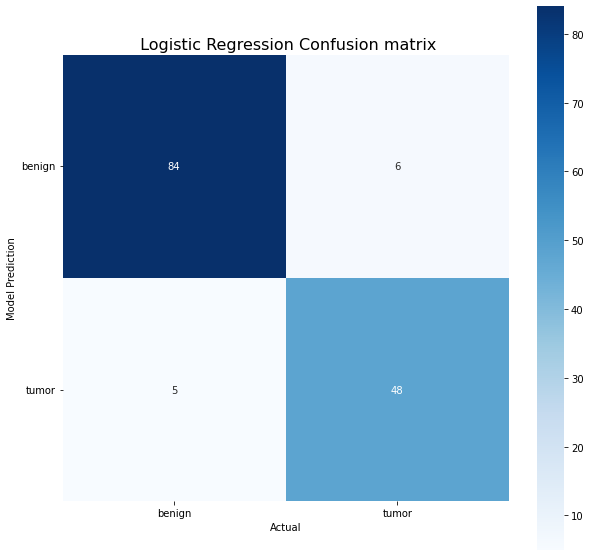

In [26]:
#visualizing the confusion matrix for Logistic Regression
confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.title(" Logistic Regression Confusion matrix", fontsize=16)
plt.show()

In [27]:
#making the classification report for Logistic Regression
print("Classification report for Logistic Regression")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for Logistic Regression
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        89
           1       0.91      0.89      0.90        54

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



#### Logistic regression with hyperparameter tuning

In [28]:
y_pred=model.predict_proba(X_test)
#making 1D array
y_pred1 = y_pred[:, 1]
y_pred1[:10]

array([0.99953046, 0.99950015, 0.9999866 , 0.99993624, 0.27412974,
       0.00256776, 0.15009336, 0.9897828 , 0.9564419 , 0.52025311])

In [29]:
#frp: False positive rate.
#trp:True positive rate.
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)

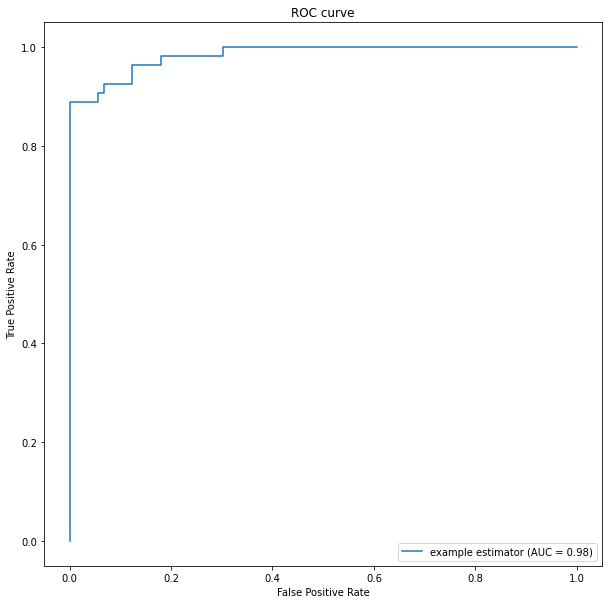

In [30]:
#frp: False positive rate.
#trp:True positive rate.
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)

In [31]:
y_pred1 = y_pred[:, 1]
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred1)
J = tpr - fpr
#calculation of index corresponding to the maximum difference of true positive rate and 
#false positive rate
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
#decisions is an array of predicted probabilities for X_test for the best threshold
decisions = (model.predict_proba(X_test) >= best_thresh).astype(int)
decisions=decisions[:, 1]
print(argmax(J))

Best Threshold=0.793517
2


In [32]:
#making the classification report for Logistic Regression with tuned hyperparameters
print("Classification report for Logistic Regression with tuned hyperparameters")
print("-"*60)
print(classification_report(Y_test, decisions))

Classification report for Logistic Regression with tuned hyperparameters
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        89
           1       1.00      0.89      0.94        54

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



### K Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
""" Defining the function that returns the best k value for the K nearest neigbor algorithm
The function knn_k_value(K, X_train, Y_train, X_test, Y_test) returns an optimal k value"""

def knn_k_value(K, X_train, Y_train, X_test, Y_test):
    score=[]
    for n in range(2,K):

        #Train Model and Predict  
        model=Pipeline([
            ("scale", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors = n))
        ]).fit(X_train, Y_train)
        predicted_labels=model.predict(X_test)
        score.append(metrics.accuracy_score(Y_test, predicted_labels))
    knn_k_value=score.index(max(score))+2
    return knn_k_value
k_value=knn_k_value(10, X_train, Y_train, X_test, Y_test)

In [35]:
#K Nearest Neighbors model

model=Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors = k_value))
]).fit(X_train, Y_train)
predicted_labels=model.predict(X_test)


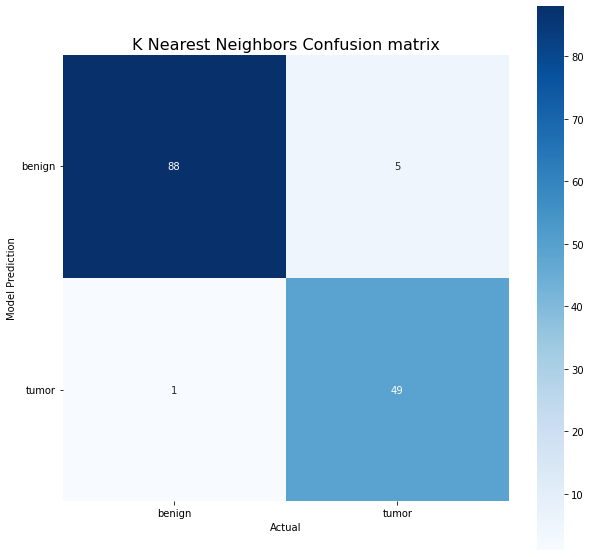

In [36]:
#visualizing the confusion matrix K Nearest Neighbors
confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.title("K Nearest Neighbors Confusion matrix", fontsize=16)
plt.show()

In [37]:
#making the classification report for K Nearest Neighbors
from sklearn.metrics import classification_report
print("Classification report for K Nearest Neighbors")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for K Nearest Neighbors
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        89
           1       0.98      0.91      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### Naive Bayes

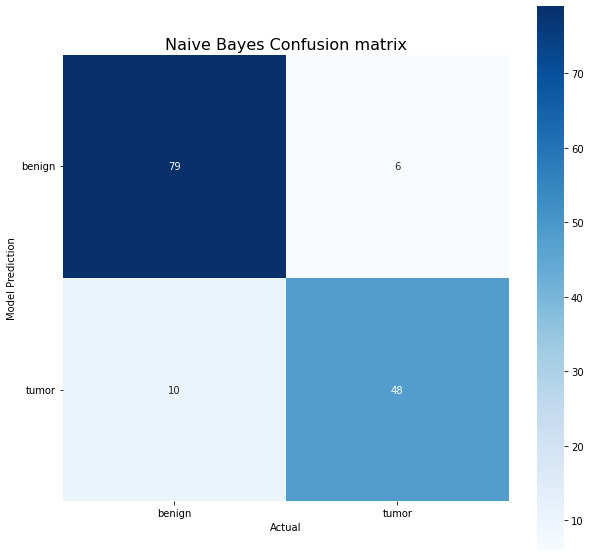

In [38]:
#Naive Bayes model

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model=Pipeline([
    ("scale", StandardScaler()),
    ("NB", GaussianNB())
]).fit(X_train, Y_train)
predicted_labels=model.predict(X_test)

#visualizing the confusion matrix for Naive Bayes
confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.title("Naive Bayes Confusion matrix", fontsize=16)
plt.show()


In [39]:
#Classification report for Naive Bayes

print("Classification report for Naive Bayes")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for Naive Bayes
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        89
           1       0.83      0.89      0.86        54

    accuracy                           0.89       143
   macro avg       0.88      0.89      0.88       143
weighted avg       0.89      0.89      0.89       143



#### Naive Bayes tuning parameters

In [40]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [41]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [42]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [43]:
model= Pipeline([("scale",StandardScaler()), 
                    ("grid", GridSearchCV(estimator=GaussianNB(), 
                           param_grid=params_NB, 
                           scoring="accuracy", 
                           refit=True, 
                           n_jobs=-1, 
                           cv=cv_method, 
                           verbose=0))]).fit(X_train, Y_train)


predicted_labels=model.predict(X_test)
print(classification_report(Y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        89
           1       0.83      0.89      0.86        54

    accuracy                           0.89       143
   macro avg       0.88      0.89      0.88       143
weighted avg       0.89      0.89      0.89       143



### Decision Tree 

#### Tuning Decision Tree parameters

In [44]:
import numpy as np
max_depth=list(np.arange(2,11))
min_samples_split=list(np.arange(2,11))
min_samples_leaf=list(np.arange(2,11))
param_dict = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}


In [45]:
model= Pipeline([("scale",StandardScaler()), 
                    ("random_grid", RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=1000), 
                           param_distributions=param_dict, 
                           scoring="accuracy", 
                           refit=True, 
                           n_jobs=-1, 
                           cv=5, 
                           verbose=0))]).fit(X_train, Y_train)


predicted_labels=model.predict(X_test)


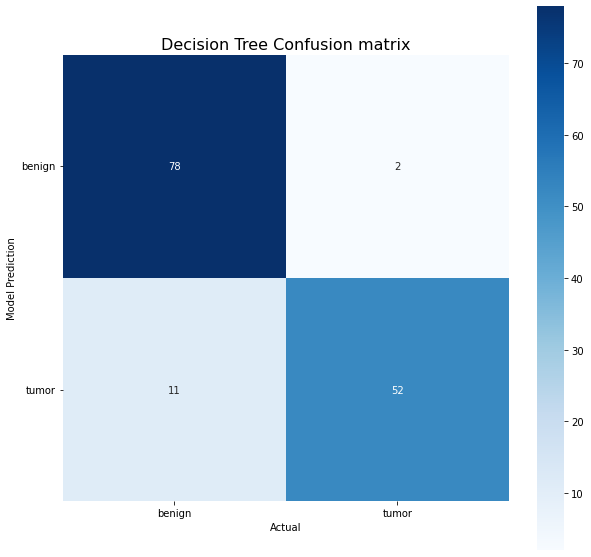

In [46]:
#visualizing the confusion matrix for Decision Tree
confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.title("Decision Tree Confusion matrix", fontsize=16)
plt.show()

In [47]:
# Print the cross validation score for the training dataset
print(f'The cross validation score is {model["random_grid"].best_score_:.4f}')

# Print the hyperparameters for the best score
print(f'The best hyperparameters are {model["random_grid"].best_params_}')

# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the train dataset is {model["random_grid"].score(model["scale"].fit_transform(X_train), Y_train):.4f}')

# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the test dataset is {model["random_grid"].score(model["scale"].transform(X_test), Y_test):.4f}')

The cross validation score is 0.9296
The best hyperparameters are {'min_samples_split': 7, 'min_samples_leaf': 9, 'max_depth': 10}
The accuracy score for the train dataset is 0.9601
The accuracy score for the test dataset is 0.9091


In [48]:
#Classification report for Decision Tree

print("Classification report for Decision Tree with tuned hyperparameters")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for Decision Tree with tuned hyperparameters
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        89
           1       0.83      0.96      0.89        54

    accuracy                           0.91       143
   macro avg       0.90      0.92      0.91       143
weighted avg       0.92      0.91      0.91       143



### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 1000)
                                   

In [50]:
#Random Forest model

model=Pipeline([
    ("scale", StandardScaler()),
    ("Tree", RandomForestClassifier())
]).fit(X_train, Y_train)
predicted_labels=model.predict(X_test)



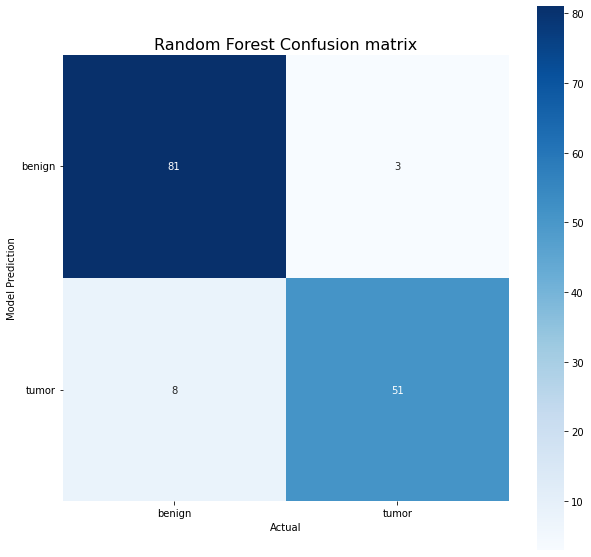

In [51]:
#visualizing the confusion matrix for Random Forest
confusion_matrix_visual(Y_test, predicted_labels, ["benign", "tumor"])
plt.title("Random Forest Confusion matrix", fontsize=16)
plt.show()

In [52]:
#Classification report for Random Forest

print("Classification report for Random Forest")
print("-"*60)
print(classification_report(Y_test, predicted_labels))

Classification report for Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        89
           1       0.86      0.94      0.90        54

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143



In [53]:
#making the df_report dataframe containing evaluation metrics for all models used in this research
d={"Logistic Regression":[1.00, 0.89, 0.96], "KNN":[0.99, 0.91, 0.96], "Naive Bayes":[0.89, 0.89, 0.89],
                       "Decision Tree":[0.89, 0.96, 0.92], "Random Forest":[0.91, 0.94, 0.92], "SVM":[0.98, 0.89, 0.94]}
df_report=pd.DataFrame(d, index=["recall=0", "recall=1", "accuracy"])
df_report


,Logistic Regression,KNN,Naive Bayes,Decision Tree,Random Forest,SVM
recall=0,1.00,0.99,0.89,0.89,0.91,0.98
recall=1,0.89,0.91,0.89,0.96,0.94,0.89
accuracy,0.96,0.96,0.89,0.92,0.92,0.94


Conclusion: The highest accuracy (0.96) show the logistic regression model and knn,
while highest recall (malignant tumor) 0.96 shows the decision tree model. Since the goal is
to predict breast cancer that the decision tree model shows the best performance
in terms of prediction malignant tumor